# Initialize Google Driver API

In [8]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

-------------------------------------------------

# List all files in  a folder

In [10]:
file_list = drive.ListFile({'q': "'1-YZGx3TTna_Bm9R8q0I_jZ-AJ6neHVdY' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: 2008.csv, id: 1mhR6hMf2SXbjqQfc8bOjuUt6YBqVQ-o_
title: Airline Arrivals 2008.csv, id: 1uJOZIGrgpGI8jLTxtT9Nf2jW31wiU2RC
title: Airline_Arrivals_Cleaned1.csv, id: 1EyZUfGMTtzFG_f1uKd9qfRKfp7pSr0KA
title: hmeq.csv, id: 1Ch66HCXH7KIhaFWu6DDS74FFdQ03kWAx
title: GBM-XGBoots--master.zip, id: 1q4xzINzwD2ZzF4U5PIgVcYztxMC9FsHp


# Read dataset file (Airline Arrivals)

In [0]:
data = drive.CreateFile({'id': '1mhR6hMf2SXbjqQfc8bOjuUt6YBqVQ-o_'})
data.GetContentFile('2008.csv')

# Import some necessary libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# set to unlimited column display:
pd.set_option('display.max_columns', None)
%matplotlib inline

# Read the data in dataframe format by using Pandas

In [0]:
df = pd.read_csv('2008.csv')

# Data structure at first glance

In [14]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


# Re-select cols that may affect to flight's delay

In [0]:
data = df[['ArrDelay','ActualElapsedTime','CRSArrTime','ArrTime','DepTime','CRSDepTime','DepDelay','Cancelled','Month','DayofMonth','DayOfWeek','Distance','FlightNum','UniqueCarrier','Origin','Dest','SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay','CarrierDelay']]

# Make a list of columns having missing values

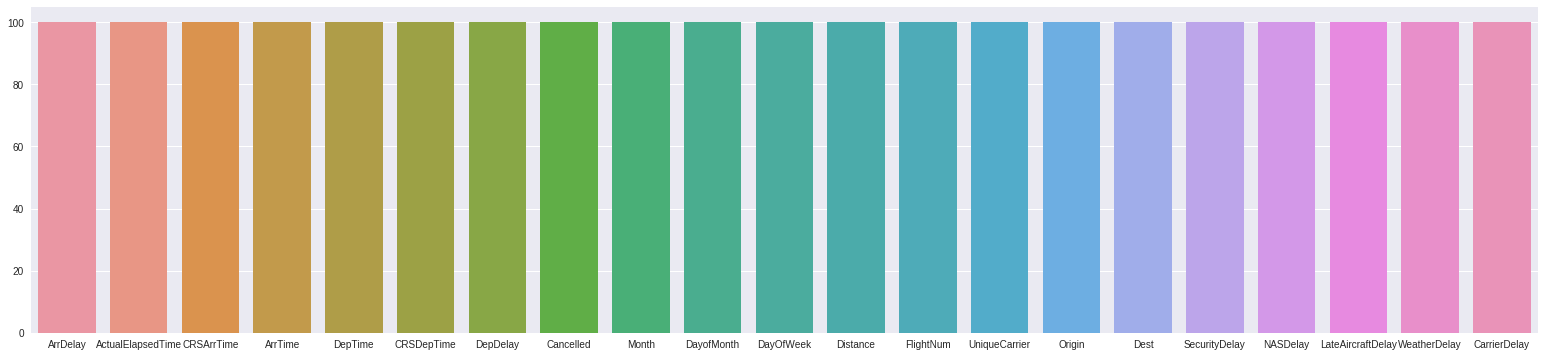

In [37]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variables','missing values']
missing_df['filling factor (%)'] = (data.shape[0]-missing_df['missing values'])/data.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop=True)
x=[]
y=[]
for i in missing_df.variables:
  x.append(i)
for j in missing_df['filling factor (%)']:
  y.append(j)
f,ax = plt.subplots(figsize=(27,6))
sns.barplot(x=x, y=y)

#### Basically, our data  does not have much missing values except five elements might cause flight's delay such as CarrierDelay, LateAirCraft and so on. My solution is to fill all these NaN rows by replacing its mean value

In [0]:
data['CarrierDelay'].fillna((int)(data['CarrierDelay'].mean()), inplace=True)
data['WeatherDelay'].fillna((int)(data['WeatherDelay'].mean()), inplace=True)
data['NASDelay'].fillna((int)(data['NASDelay'].mean()), inplace=True)
data['SecurityDelay'].fillna((int)(data['SecurityDelay'].mean()), inplace=True)
data['LateAircraftDelay'].fillna((int)(data['LateAircraftDelay'].mean()), inplace=True)
data['ArrDelay'].fillna((int)(data['ArrDelay'].mean()), inplace=True)
data['ActualElapsedTime'].fillna((int)(data['ActualElapsedTime'].mean()), inplace=True)
data['ArrTime'].fillna((int)(data['ArrTime'].mean()), inplace=True)
data['DepTime'].fillna((int)(data['DepTime'].mean()), inplace=True)
data['DepDelay'].fillna((int)(data['DepDelay'].mean()), inplace=True)

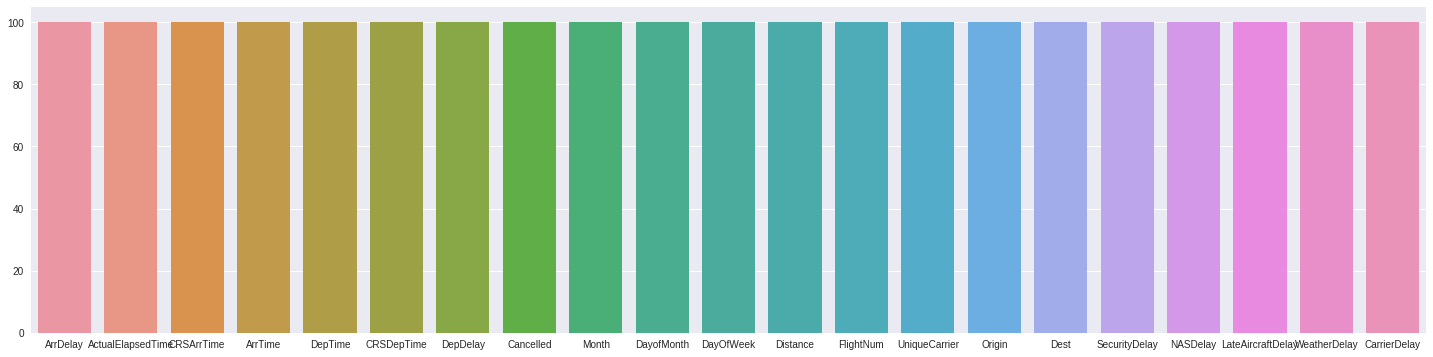

In [31]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variables','missing values']
missing_df['filling factor (%)'] = (data.shape[0]-missing_df['missing values'])/data.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop=True)
x=[]
y=[]
for i in missing_df.variables:
  x.append(i)
for j in missing_df['filling factor (%)']:
  y.append(j)
f,ax = plt.subplots(figsize=(27,6))
sns.barplot(x=x, y=y)

# Types of Datatype

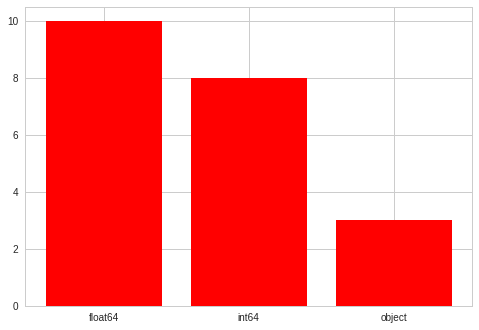

In [80]:
count={'float64':0,'int64':0,'object':0}
for i, j in data.dtypes.items():
  count[str(j)]=count[str(j)]+1
plt.bar(range(len(count)), list(count.values()), align='center', color='red')
plt.xticks(range(len(count)), list(count.keys()))
plt.show()

#### To models can understand these features, i will encode these cols object type UniqueCarrier, Origin, Dest like  into interger datatype

In [0]:
from sklearn.preprocessing import LabelEncoder
lbEncoder = LabelEncoder()
data['UniqueCarrier'] = lbEncoder.fit_transform(data.UniqueCarrier)
data['Origin'] = lbEncoder.fit_transform(data.Origin)
data['Dest'] = lbEncoder.fit_transform(data.Dest)

#### Check the result after encoding

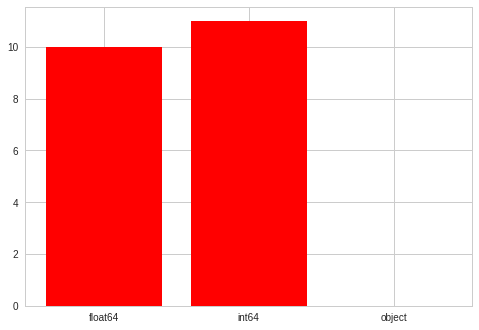

In [82]:
count={'float64':0,'int64':0,'object':0}
for i, j in data.dtypes.items():
  count[str(j)]=count[str(j)]+1
plt.bar(range(len(count)), list(count.values()), align='center', color='red')
plt.xticks(range(len(count)), list(count.keys()))
plt.show()

# Plot variable correlations

In [83]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr=data.corr()
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ArrDelay,ActualElapsedTime,CRSArrTime,ArrTime,DepTime,CRSDepTime,DepDelay,Cancelled,Month,DayofMonth,DayOfWeek,Distance,FlightNum,UniqueCarrier,Origin,Dest,SecurityDelay,NASDelay,LateAircraftDelay,WeatherDelay,CarrierDelay
ArrDelay,1,0.094,0.11,0.066,0.18,0.12,0.93,-0.00061,-0.041,0.0016,0.01,0.0065,0.016,-0.023,-0.018,-0.0016,0.026,0.25,0.36,0.19,0.37
ActualElapsedTime,0.094,1,0.051,0.038,-0.017,-0.017,0.044,-0.00064,-0.014,0.0006,0.013,0.96,-0.31,-0.2,0.036,0.066,0.0047,0.11,-0.042,-0.0068,-0.015
CRSArrTime,0.11,0.051,1,0.85,0.78,0.79,0.13,0.013,0.00025,-0.0014,0.0052,0.046,-0.028,-0.017,-0.006,0.016,0.00055,-0.0042,0.072,0.0037,-0.022
ArrTime,0.066,0.038,0.85,1,0.71,0.69,0.073,-7.1e-05,-0.0004,-0.0015,0.0033,0.029,-0.017,-0.011,-0.0042,0.012,0.0013,0.011,-0.0032,-0.011,-0.029
DepTime,0.18,-0.017,0.78,0.71,1,0.96,0.2,-5.1e-05,-0.01,-0.0015,0.0055,-0.016,-0.006,0.012,-0.036,0.028,0.0025,-0.0054,0.099,0.011,0.004
CRSDepTime,0.12,-0.017,0.79,0.69,0.96,1,0.14,0.016,-0.0082,-0.0014,0.0053,-0.013,-0.011,0.011,-0.036,0.028,-0.00018,-0.022,0.087,0.0033,-0.021
DepDelay,0.93,0.044,0.13,0.073,0.2,0.14,1,-0.0025,-0.03,0.0033,0.015,0.026,0.0094,-0.0051,-0.0067,0.0039,0.025,0.12,0.45,0.2,0.44
Cancelled,-0.00061,-0.00064,0.013,-7.1e-05,-5.1e-05,0.016,-0.0025,1,-0.028,-0.0084,-0.0063,-0.037,0.042,-0.0076,-0.0032,-0.0046,-0.0027,-0.00034,-0.0013,-0.00013,-0.0013
Month,-0.041,-0.014,0.00025,-0.0004,-0.01,-0.0082,-0.03,-0.028,1,0.0018,-0.0037,-0.0041,0.0025,-0.0056,-0.0082,-0.0083,-0.0032,0.0063,0.00022,0.0026,-0.00092
DayofMonth,0.0016,0.0006,-0.0014,-0.0015,-0.0015,-0.0014,0.0033,-0.0084,0.0018,1,0.0057,0.0018,-0.00068,-0.0011,7.6e-05,8.8e-05,-0.00019,0.0019,0.0043,0.00058,8.8e-05


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
feature_columns = ['ArrDelay','ActualElapsedTime','CRSArrTime','ArrTime','DepTime','CRSDepTime','DepDelay','Cancelled','Month','DayofMonth','DayOfWeek','Distance','FlightNum','UniqueCarrier','Origin','Dest','SecurityDelay','NASDelay','LateAircraftDelay','WeatherDelay','CarrierDelay']
X = data[feature_columns]
y = data.Cancelled

In [0]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# print(X.shape)
# X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
# X_new.shape

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,svd_solver='full')
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
#using Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   1718188
          1       1.00      1.00      1.00     34244

avg / total       1.00      1.00      1.00   1752432



In [28]:
#using Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   1718188
          1       1.00      0.99      1.00     34244

avg / total       1.00      1.00      1.00   1752432



In [0]:
#using Support Vector Machine
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [21]:
#using Logistic Regression
from sklearn.linear_model import LogisticRegression
#We call our estimator instance clf, as it is a classifier.
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00   1718188
          1       1.00      0.56      0.72     34244

avg / total       0.99      0.99      0.99   1752432

